In [122]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [123]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set() # seaborn 속성을 기본값으로 설정

파일에서 데이터를 읽어들임

In [124]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

#from enum import Enum
class Columns:
    # 원래 존재하는 항목
    PassengerId = "PassengerId"
    Survived = "Survived"
    Pclass = "Pclass"
    Name = "Name"
    Sex = "Sex"
    Age = "Age"
    SibSp = "SibSp"
    Parch = "Parch"
    Ticket = "Ticket"
    Fare = "Fare"
    Cabin = "Cabin"
    Embarked = "Embarked"
    
    # 새로 생성하는 항목
    Title = "Title"
    FareBand = "FareBand"
    Family = "Family"
    Deck = "Deck" # Cabin의 알파벳을 떼서 Deck을 지정한다.

In [125]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


test의 경우 예측에서 제출해야 하는 데이터이기에 Survived 항목이 없다.

In [137]:
print(test.head(n=test.shape[0]))

     PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jon

## 입력 데이터 :

- **PassengerId** : 승객 번호<br>
- **Survived** : 생존여부(1: 생존, 0 : 사망)<br>
- **Pclass** : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)<br>
- **Name** : 승객 이름<br>
- **Sex** : 승객 성별 (male/female)<br>
- **Age** : 승객 나이(float) <br>
- **SibSp** : 동반한 형제자매, 배우자 수<br>
- **Parch** : 동반한 부모, 자식 수<br>
- **Ticket** : 티켓의 고유 넘버(문자열)<br>
- **Fare** 티켓의 요금(float)<br>
- **Cabin** : 객실 번호<br>
- **Embarked** : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)<br>



데이터가 존재하지 않는 feature들을 확인해 본다.

### 데이터 속성 확인

Pclass 에 따른 생존률

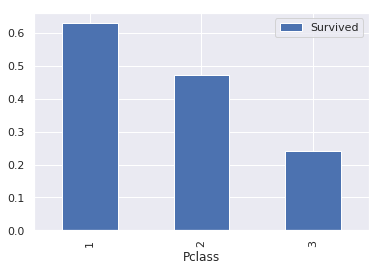

In [127]:
train[[Columns.Pclass, Columns.Survived]].groupby([Columns.Pclass]).mean().plot.bar()

성별에 따른 생존률

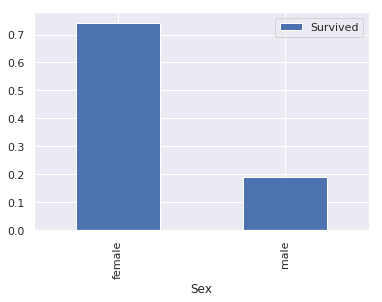

In [128]:
train[[Columns.Sex, Columns.Survived]].groupby([Columns.Sex]).mean().plot.bar()

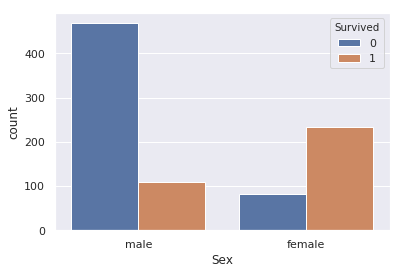

In [129]:
sns.countplot(x=Columns.Sex, hue=Columns.Survived, data=train)

Age에 따른 생존률

일단 Age의 분포는 어떨까?

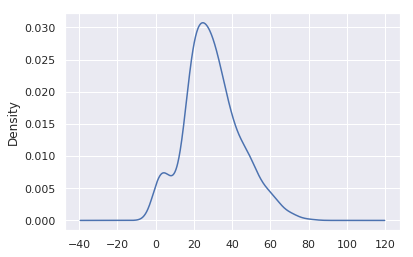

In [130]:
train[Columns.Age].plot.kde()

Age : 0  ~  80
gap: 6
[-1, 0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, inf]


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


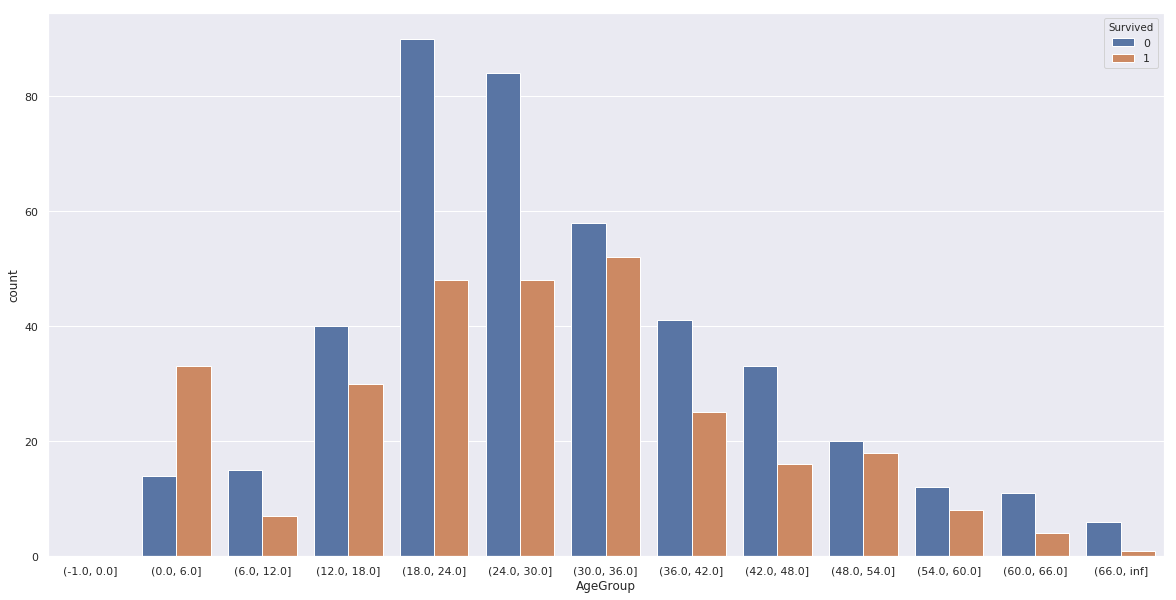

In [131]:
df = train[train[Columns.Age].isnull() == False]
#df.describe()

# 나이대로 나누어서 출력해 본다.
age_min = df[Columns.Age].min().astype('int')
age_max = df[Columns.Age].max().astype('int')
print("Age :", age_min, " ~ ", age_max)
gap = ((age_max - age_min) / 12).astype(int)
print('gap:', gap)

bins = [-1]
for i in range(12):
    bins.append(i * gap)
bins.append(np.inf)
print(bins)

_df = df
_df['AgeGroup'] = pd.cut(_df[Columns.Age], bins)
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot('AgeGroup', hue=Columns.Survived, data=_df, ax=ax)

Pclass/Age에 따른 생존률 변화량

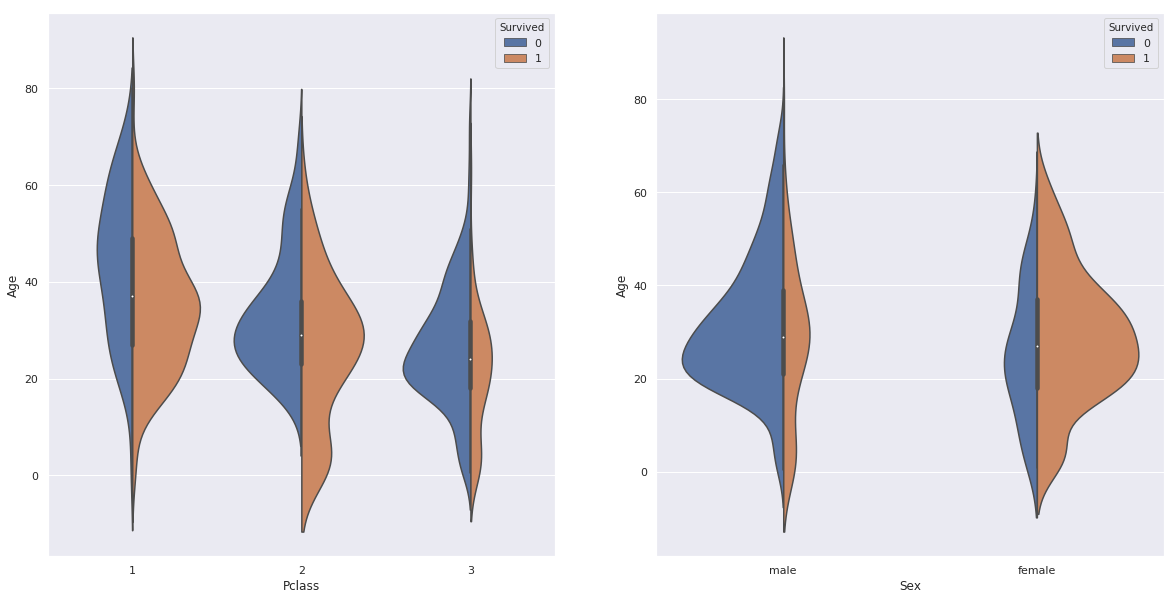

In [132]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.violinplot(Columns.Pclass, Columns.Age, hue=Columns.Survived, data=train, scale='count', split=True, ax=ax[0])
sns.violinplot(Columns.Sex, Columns.Age, hue=Columns.Survived, data=train, scale='count', split=True, ax=ax[1])

In [133]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

가족 수 ( Parch + SibSp + 1(자기자신))과 생존률을 비교해 본다.

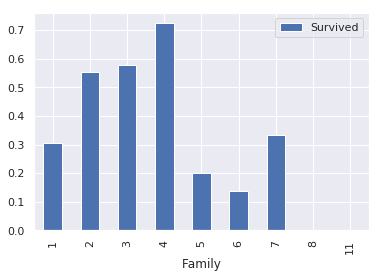

In [135]:
_train = train
_train['Family'] = _train[Columns.SibSp] + _train[Columns.Parch] + 1
_train[['Family', Columns.Survived]].groupby('Family').mean().plot.bar()

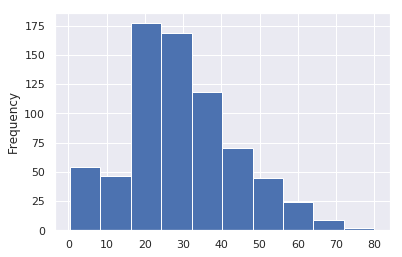

In [136]:
train[Columns.Age].plot.hist()

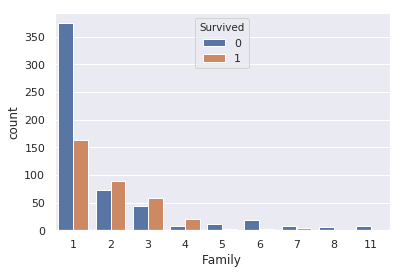

In [76]:
sns.countplot(x='Family', hue=Columns.Survived, data=_train)

### 데이터 가공

1. 비어있는 데이터(null)을 처리한다.<br>

###### 기존 feature들을 보완/가공
**Age** : null이 많고 나이가 중요할 것으로 판단되니 데이터를 채워야 할 필요가 있다.<br>
**Cabin** : null이 너무 많다.<br>
**Embarked** : null이 거의 없으므로 중요하지 않은 값으로 채워도 문제가 없어 보임<br>
**Parse, SibSp** : 합쳐서 Family로 만들고 삭제하자.

###### 새로운 feature를 추가
**Family** : Parch + SibSp + 1(자기자신)

## train/test를 따로 하지 말고, 합쳐서 처리하고 마지막(모델 넣기 직전)에 다시 분리한다.

In [77]:
train_len = train.shape[0]
merged = train.append(test, sort=False, ignore_index=True)
merged.head(n=merged.shape[0])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1.0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1.0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5.0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3.0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2.0


Parch와 SibSp를 Family로 변경한다.

In [78]:
merged[Columns.Family] = merged[Columns.Parch] + merged[Columns.SibSp] + 1
if Columns.Parch in merged:    
    merged = merged.drop([Columns.Parch], axis=1)
if Columns.SibSp in merged:
    merged = merged.drop([Columns.SibSp], axis=1)
    
merged.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


### Embarked 정리
빈 갯수가 몇개 없으므로 그냥 가장 많은 것으로 채운다.

In [79]:
most_embarked_label = merged[Columns.Embarked].value_counts().index[0]

merged.fillna({Columns.Embarked : most_embarked_label})
merged.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309,1308.000000,295,1307,1309.000000
unique,NaN,NaN,NaN,1307,2,NaN,929,NaN,186,3,NaN
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN
freq,NaN,NaN,NaN,2,843,NaN,11,NaN,6,914,NaN
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,NaN,33.295479,NaN,NaN,1.883881
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,NaN,51.758668,NaN,NaN,1.583639
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,NaN,0.000000,NaN,NaN,1.000000
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,NaN,7.895800,NaN,NaN,1.000000
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,NaN,14.454200,NaN,NaN,1.000000
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,NaN,31.275000,NaN,NaN,2.000000


In [80]:
mapping = pd.Series([1,2,3], ['S', 'C', 'Q'])
merged[Columns.Embarked] = merged[Columns.Embarked].map(mapping)

# float로 변경:
merged[Columns.Embarked] = merged[Columns.Embarked].astype('float')

In [81]:
merged.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309,1308.000000,295,1307.000000,1309.000000
unique,NaN,NaN,NaN,1307,2,NaN,929,NaN,186,NaN,NaN
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,CA. 2343,NaN,C23 C25 C27,NaN,NaN
freq,NaN,NaN,NaN,2,843,NaN,11,NaN,6,NaN,NaN
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,NaN,33.295479,NaN,1.394797,1.883881
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,NaN,51.758668,NaN,0.653817,1.583639
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,NaN,0.000000,NaN,1.000000,1.000000
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,NaN,7.895800,NaN,1.000000,1.000000
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,NaN,14.454200,NaN,1.000000,1.000000
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,NaN,31.275000,NaN,2.000000,2.000000


Name에서 호칭을 추출해서 새 항목(Title)을 추가하고 숫자값으로 변환한다.
Name은 지운다.

In [82]:
# Name에서 Title 추출(그냥 알파벳 끝에 .이 붙어 있는걸 추출한다.)
merged[Columns.Title] = merged.Name.str.extract('([A-Za-z]+)\. ', expand=False) # expand:True면 DataFrame을, False면 Series를 리턴한다.

print("initial titles : ", merged[Columns.Title].value_counts().index)

# 정리
merged[Columns.Title] = merged[Columns.Title].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
merged[Columns.Title] = merged[Columns.Title].replace(['Countess', 'Lady', 'Sir'], 'Royal')
merged[Columns.Title] = merged[Columns.Title].replace(['Mlle'], 'Miss')
merged[Columns.Title] = merged[Columns.Title].replace(['Ms'], 'Miss')
merged[Columns.Title] = merged[Columns.Title].replace(['Mme'], 'Mrs')
    
print(merged[[Columns.Title, Columns.Survived]].groupby(Columns.Title).mean())

idxs = merged[Columns.Title].value_counts().index # 많은 순서대로 정렬해서 오름차순으로 값을 매김
print(idxs)
mapping = {}
for i in range(len(idxs)):
    mapping[idxs[i]] = i + 1
print(mapping)

merged[Columns.Title] = merged[Columns.Title].map(mapping)


if Columns.Name in merged:
    merged = merged.drop([Columns.Name], axis=1)
    
merged.head()

initial titles :  Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Col', 'Ms', 'Mlle',
       'Major', 'Sir', 'Jonkheer', 'Don', 'Mme', 'Countess', 'Lady', 'Dona',
       'Capt'],
      dtype='object')
        Survived
Title           
Master  0.575000
Miss    0.702703
Mr      0.156673
Mrs     0.793651
Rare    0.285714
Royal   1.000000
Index(['Mr', 'Miss', 'Mrs', 'Master', 'Rare', 'Royal'], dtype='object')
{'Mrs': 3, 'Mr': 1, 'Miss': 2, 'Rare': 5, 'Master': 4, 'Royal': 6}


,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0.0,3,male,22.0,A/5 21171,7.2500,NaN,1.0,2,1
1,2,1.0,1,female,38.0,PC 17599,71.2833,C85,2.0,2,3
2,3,1.0,3,female,26.0,STON/O2. 3101282,7.9250,NaN,1.0,1,2
3,4,1.0,1,female,35.0,113803,53.1000,C123,1.0,2,3
4,5,0.0,3,male,35.0,373450,8.0500,NaN,1.0,1,1


Sex 항목을 숫자로 변경

In [83]:
mapping = {'male':0, 'female':1}
merged[Columns.Sex] = merged[Columns.Sex].map(mapping)

In [84]:
merged.head(n=10)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0.0,3,0,22.0,A/5 21171,7.2500,NaN,1.0,2,1
1,2,1.0,1,1,38.0,PC 17599,71.2833,C85,2.0,2,3
2,3,1.0,3,1,26.0,STON/O2. 3101282,7.9250,NaN,1.0,1,2
3,4,1.0,1,1,35.0,113803,53.1000,C123,1.0,2,3
4,5,0.0,3,0,35.0,373450,8.0500,NaN,1.0,1,1
5,6,0.0,3,0,NaN,330877,8.4583,NaN,3.0,1,1
6,7,0.0,1,0,54.0,17463,51.8625,E46,1.0,1,1
7,8,0.0,3,0,2.0,349909,21.0750,NaN,1.0,5,4
8,9,1.0,3,1,27.0,347742,11.1333,NaN,1.0,3,3
9,10,1.0,2,1,14.0,237736,30.0708,NaN,2.0,2,3


### 비어있는 Age를 처리

Title로 적당히 추리한다. (너무 때려맞추기가 아닌지...?)

In [85]:
# {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5, 'Royal': 6}

mapping = {1:21, 2:28, 3:28, 4:40, 5:50, 6:60}
def guess_age(row):
    return mapping[row[Columns.Title]]

def fixup_age(df):
    for idx, row in df[df[Columns.Age].isnull() == True].iterrows():
        df.loc[idx, Columns.Age] = guess_age(row)
    return df
    
merged = fixup_age(merged)
merged.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309,1308.000000,295,1307.000000,1309.000000,1309.000000
unique,NaN,NaN,NaN,NaN,NaN,929,NaN,186,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,11,NaN,6,NaN,NaN,NaN
mean,655.000000,0.383838,2.294882,0.355997,28.652154,NaN,33.295479,NaN,1.394797,1.883881,1.734148
std,378.020061,0.486592,0.837836,0.478997,13.274974,NaN,51.758668,NaN,0.653817,1.583639,1.027706
min,1.000000,0.000000,1.000000,0.000000,0.170000,NaN,0.000000,NaN,1.000000,1.000000,1.000000
25%,328.000000,0.000000,2.000000,0.000000,21.000000,NaN,7.895800,NaN,1.000000,1.000000,1.000000
50%,655.000000,0.000000,3.000000,0.000000,27.000000,NaN,14.454200,NaN,1.000000,1.000000,1.000000
75%,982.000000,1.000000,3.000000,1.000000,36.000000,NaN,31.275000,NaN,2.000000,2.000000,2.000000


### Ticket 항목을 분석

In [86]:
merged[Columns.Ticket].unique().shape
merged.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0.0,3,0,22.0,A/5 21171,7.2500,NaN,1.0,2,1
1,2,1.0,1,1,38.0,PC 17599,71.2833,C85,2.0,2,3
2,3,1.0,3,1,26.0,STON/O2. 3101282,7.9250,NaN,1.0,1,2
3,4,1.0,1,1,35.0,113803,53.1000,C123,1.0,2,3
4,5,0.0,3,0,35.0,373450,8.0500,NaN,1.0,1,1


ticket 항목 중 중복되는 것이 있다는 것을 알 수 있다.
중복되는 항목들의 Fare를 찾아보면 모두 같다.
===> ticket이 중복되었다고 돈을 나눠야 할 이유는 없을지도...

No Cabin Fare: 19.132707206317864
Cabin Fare: 76.14150392156863


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


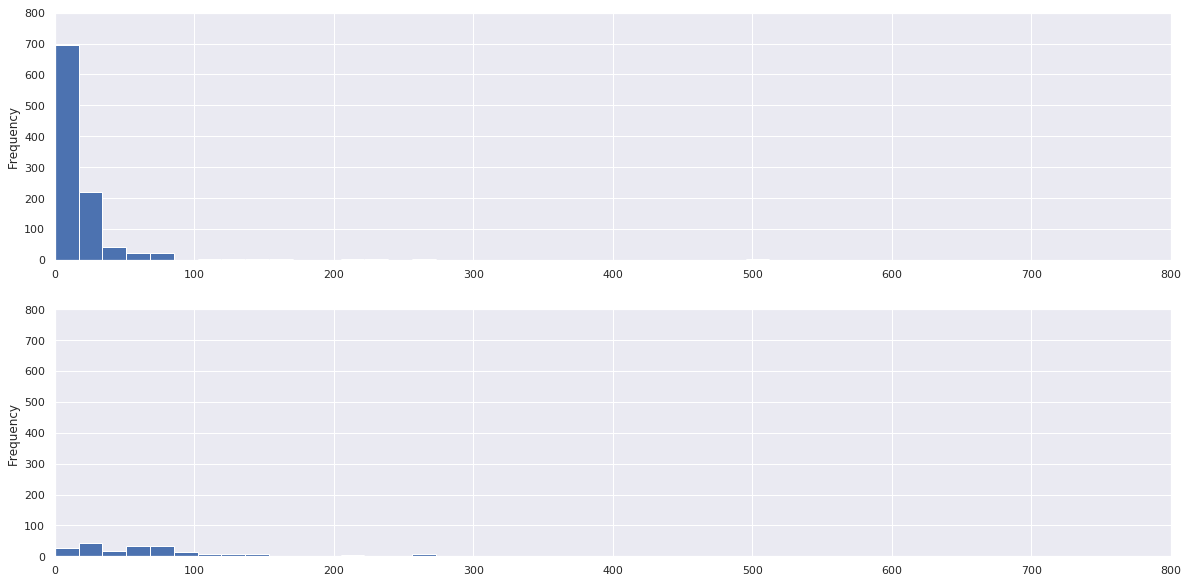

In [87]:
tickets = merged[Columns.Ticket]

df = merged

# 중복되는 ticket을 가진 사람들의 fare는? => 같다.
def show_shared_tickets(df):
    for ticket in tickets:
        if df[df[Columns.Ticket] == ticket].shape[0] > 1:
            print("\nTicket:", ticket)
            print(df[df[Columns.Ticket] == ticket][Columns.Fare], df[df[Columns.Ticket] == ticket][Columns.Cabin], \
                  df[df[Columns.Ticket] == ticket][Columns.Embarked])

#show_shared_tickets(df)
            
'''
표에 액수가 중복되었다고 돈을 나눌 필요는 없을 것 같아서 주석 처리함.
ticket number가 중복이어도 돈을 나눠서 찍었을 수도 있어서...
'''

def divide_fare_by_shared_tickets(df):
    for ticket in tickets:
        tmpdf = df[df[Columns.Ticket] == ticket]
        if tmpdf.shape[0] > 1:
            total_fare = df[df[Columns.Ticket] == ticket][Columns.Fare].value_counts().index[0]            
            per_people = df[df[Columns.Ticket] == ticket].shape[0]            
            df[df[Columns.Ticket] == ticket][Columns.Fare] = total_fare / per_people
    return df
            
df = divide_fare_by_shared_tickets(df)


#cabin / fare
#non-cabin / fare

# cabin이 있고/없고에 따른 fare의 차이
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].set_xlim([0, 800])
ax[1].set_xlim([0, 800])
ax[0].set_ylim([0, 800])
ax[1].set_ylim([0, 800])
df = df[df[Columns.Cabin].isnull()]
df[Columns.Fare].plot.hist(ax=ax[0], bins=30)
print("No Cabin Fare:", df[Columns.Fare].mean())

df = train[train[Columns.Cabin].isnull() == False]
df[Columns.Fare].plot.hist(ax=ax[1], bins=30)
print("Cabin Fare:", df[Columns.Fare].mean())



In [88]:
merged.head(n=100)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0.0,3,0,22.00,A/5 21171,7.2500,NaN,1.0,2,1
1,2,1.0,1,1,38.00,PC 17599,71.2833,C85,2.0,2,3
2,3,1.0,3,1,26.00,STON/O2. 3101282,7.9250,NaN,1.0,1,2
3,4,1.0,1,1,35.00,113803,53.1000,C123,1.0,2,3
4,5,0.0,3,0,35.00,373450,8.0500,NaN,1.0,1,1
5,6,0.0,3,0,21.00,330877,8.4583,NaN,3.0,1,1
6,7,0.0,1,0,54.00,17463,51.8625,E46,1.0,1,1
7,8,0.0,3,0,2.00,349909,21.0750,NaN,1.0,5,4
8,9,1.0,3,1,27.00,347742,11.1333,NaN,1.0,3,3
9,10,1.0,2,1,14.00,237736,30.0708,NaN,2.0,2,3


In [89]:
def divide_fare_by_shared_tickets(df):
    for ticket in tickets:
        tmpdf = df[df[Columns.Ticket] == ticket]
        if tmpdf.shape[0] > 1:
            total_fare = tmpdf[Columns.Fare].values[0]
            per_people = tmpdf.shape[0]            
            #df[df[Columns.Ticket] == ticket][Columns.Fare] = total_fare / per_people
            df.loc[df[Columns.Ticket] == ticket, [Columns.Fare]] = total_fare / per_people
    return df
            
merged = divide_fare_by_shared_tickets(merged)
merged.head(n=100)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0.0,3,0,22.00,A/5 21171,7.250000,NaN,1.0,2,1
1,2,1.0,1,1,38.00,PC 17599,17.820825,C85,2.0,2,3
2,3,1.0,3,1,26.00,STON/O2. 3101282,7.925000,NaN,1.0,1,2
3,4,1.0,1,1,35.00,113803,13.275000,C123,1.0,2,3
4,5,0.0,3,0,35.00,373450,8.050000,NaN,1.0,1,1
5,6,0.0,3,0,21.00,330877,8.458300,NaN,3.0,1,1
6,7,0.0,1,0,54.00,17463,12.965625,E46,1.0,1,1
7,8,0.0,3,0,2.00,349909,0.006744,NaN,1.0,5,4
8,9,1.0,3,1,27.00,347742,0.412344,NaN,1.0,3,3
9,10,1.0,2,1,14.00,237736,7.517700,NaN,2.0,2,3


Ticket이 같은 사람의 경우 다른 사람의 Cabin을 넣도록 한다.
=>사실 몇명 안된다.

In [90]:
def empty_cabin_but_oterhs_have_cabin_cnt(df):
    ret = 0    
    # cabin이 null이면 ticket이 같은걸 찾아서 cabin값을 가져온다.
    for idx, row in df[df[Columns.Cabin].isnull() == True].iterrows(): #Cabin이 없는 행에 대해        
        ticket = row[Columns.Ticket]
        cabin = df[df[Columns.Ticket] == ticket][Columns.Cabin].value_counts().index #같은 ticket을 가진 사람들 중 가장 많은 Cabin값을 가져온다.
        if len(cabin) > 0: #Cabin이 있으면 현제 row는 Cabin이 없지만 채울 수 있는 것이다.
            #print(row)
            ret = ret + 1
            
            
    return ret

print("count of fillable cabin : ", empty_cabin_but_oterhs_have_cabin_cnt(merged))

merged.head()





count of fillable cabin :  16


,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0.0,3,0,22.0,A/5 21171,7.250000,NaN,1.0,2,1
1,2,1.0,1,1,38.0,PC 17599,17.820825,C85,2.0,2,3
2,3,1.0,3,1,26.0,STON/O2. 3101282,7.925000,NaN,1.0,1,2
3,4,1.0,1,1,35.0,113803,13.275000,C123,1.0,2,3
4,5,0.0,3,0,35.0,373450,8.050000,NaN,1.0,1,1


In [91]:
tm = merged.copy()

tickets = merged[Columns.Ticket]

# 중복되는 ticket을 가진 사람들의 cabin은?
# ==> cabin값이 비어 있으면 ticket이 같은 다른 사람들의 cabin값으로 채운다.
def fixup_cabin_by_ticket(df):
    # cabin이 null이면 ticket이 같은걸 찾아서 cabin값을 가져온다.
    fixed = 0
    iterdf = df[df[Columns.Cabin].isnull() == True].copy()
    for idx, row in iterdf.iterrows(): # 각각의 행의 값을 읽어들일 필요가 있을 때.
        ticket = row[Columns.Ticket] # 현재 행의 ticket값을 얻는다.
        # 같은 ticket을 가진 다른 사용자들의 Cabin값들을 얻어온다.
        cabin = df[df[Columns.Ticket] == ticket][Columns.Cabin].value_counts().index
        if len(cabin) > 0: # 다른 사용자에게 Cabin이 있으면 
            df.loc[idx, Columns.Cabin] = cabin[0] # 그 값을 사용한다.
    
    # 검증단계:
    for ticket in tickets:        
        if df[df[Columns.Ticket] == ticket].shape[0] > 1:
            # 다 null이거나 다 null이 아니건나 해야 한다.
            '''
            아래 나누어서 한 이유는 : 
            아래와 같이 하게 되면,
            if df[df[Columns.Ticket] == ticket][df[Columns.Cabin].isnull() == True].shape[0] != 0 and df[df[Columns.Ticket] == ticket][df[Columns.Cabin].isnull() == False].shape[0] != 0:
            df[df[Columns.Ticket] == ticket]과 [df[Columns.Cabin].isnull() == True]의 크기가 달라져서,
            
                UserWarning: Boolean Series key will be reindexed to match DataFrame index.
            
            위와 같은 에러가 발생하기 때문이다.
            Pandas가 자동으로 index를 기준으로 boolean vector를 reindex해서 맞춰 주지만, implicit한 동작이어서 나중에 변경될 수 있으므로 warning으로 알려주는 것이다.
            다름 링크 내용을 참고한다.
            https://stackoverflow.com/questions/41710789/boolean-series-key-will-be-reindexed-to-match-dataframe-index            
            '''
            df2 = df[df[Columns.Ticket] == ticket] # ticket이 같은 것을 모두 모은다.
            if df2[df2[Columns.Cabin].isnull() == True].shape[0] != 0 and df2[df2[Columns.Cabin].isnull() == False].shape[0] != 0:
                print('Wrong!')
                print(df2[[Columns.Ticket, Columns.Cabin]])
    return df

fixup_cabin_by_ticket(tm)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0.0,3,0,22.0,A/5 21171,7.250000,NaN,1.0,2,1
1,2,1.0,1,1,38.0,PC 17599,17.820825,C85,2.0,2,3
2,3,1.0,3,1,26.0,STON/O2. 3101282,7.925000,NaN,1.0,1,2
3,4,1.0,1,1,35.0,113803,13.275000,C123,1.0,2,3
4,5,0.0,3,0,35.0,373450,8.050000,NaN,1.0,1,1
5,6,0.0,3,0,21.0,330877,8.458300,NaN,3.0,1,1
6,7,0.0,1,0,54.0,17463,12.965625,E46,1.0,1,1
7,8,0.0,3,0,2.0,349909,0.006744,NaN,1.0,5,4
8,9,1.0,3,1,27.0,347742,0.412344,NaN,1.0,3,3
9,10,1.0,2,1,14.0,237736,7.517700,NaN,2.0,2,3


In [92]:
merged = fixup_cabin_by_ticket(merged)

count of fillable cabin :  0
Index(['G', 'F', 'C', 'B', 'E', 'D', 'A', 'T'], dtype='object', name='Deck')
deck= 1
deck= 3
deck= 4
deck= 7
deck= 6
deck= 5
deck= 2


,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Deck
0,1,0.0,3,0,22.0,A/5 21171,7.250000,NaN,1.0,2,1,1
1,2,1.0,1,1,38.0,PC 17599,17.820825,C85,2.0,2,3,3
2,3,1.0,3,1,26.0,STON/O2. 3101282,7.925000,NaN,1.0,1,2,1
3,4,1.0,1,1,35.0,113803,13.275000,C123,1.0,2,3,3
4,5,0.0,3,0,35.0,373450,8.050000,NaN,1.0,1,1,1
5,6,0.0,3,0,21.0,330877,8.458300,NaN,3.0,1,1,1
6,7,0.0,1,0,54.0,17463,12.965625,E46,1.0,1,1,5
7,8,0.0,3,0,2.0,349909,0.006744,NaN,1.0,5,4,1
8,9,1.0,3,1,27.0,347742,0.412344,NaN,1.0,3,3,1
9,10,1.0,2,1,14.0,237736,7.517700,NaN,2.0,2,3,1


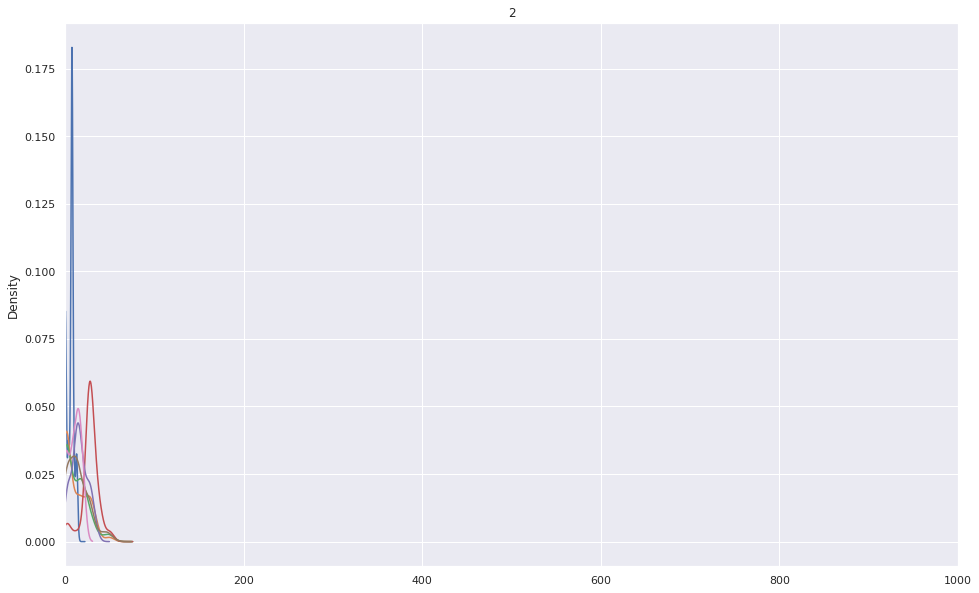

In [93]:
print("count of fillable cabin : ", empty_cabin_but_oterhs_have_cabin_cnt(merged))


#train[train['TicketNumber'].isnull()]
#train['TicketNumber'] = train['TicketNumber'].fillna(0)
# train.describe(include='all')

# Cabin에 대한 요금은?
# for i, row in train[train[Columns.Cabin].isnull() == False].iterrows():
#     cabin_grade = row.str.extract('([A-Za-z]+)', expand=False)
    #print(type(cabin_grade))
    #print("cabin grade", cabin_grade[Columns.Cabin])
    
#train.loc[train[Columns.Cabin].isnull() == False].Cabin.str.extract('([A-Za-z]+)', expand=False)

def make_deck(df):
    '''
    Cabin에서 알파벳을 떼서 Deck 알파벳을 생성한다.
    '''
    df[Columns.Deck] = df[Columns.Cabin].str.extract('([A-Za-z]+)', expand=True)
    return df

merged = make_deck(merged)
merged.describe(include='all')

#df[[Columns.Deck, Columns.Fare]].groupby([Columns.Deck]).mean().plot.bar()  # Deck에 따른 요금제

'''
Deck            
G      13.581250
F      18.958329
T      35.500000
A      39.623887
E      44.950127
D      57.244576
C     106.152051
B     121.814585
'''
def guess_deck_by_fare(fare):
    if fare < 15.0:
        return 'G'
    elif fare  < 25.0:
        return 'F'
    elif fare < 42.0:
        return 'A'
    elif fare < 50.0:
        return 'E'
    elif fare < 70.0:
        return 'D'
    elif fare < 110.0:
        return 'C'
    else:
        return 'B'

def fill_empty_decks(df):
    '''
    비어있는 Deck을 Fare값으로 추정해서 채운다.
    '''
    for idx, row in df[df[Columns.Deck].isnull() == True].iterrows():
        df.loc[idx, Columns.Deck] = guess_deck_by_fare(row[Columns.Fare])
    return df

merged = fill_empty_decks(merged)

# Cabin을 숫자로 변경한다.
def cabin_as_number(df):
    mean_values = df[[Columns.Deck, Columns.Fare]].groupby([Columns.Deck]).mean().sort_values(by=[Columns.Fare])
    print(mean_values.index)
    mapping = {}
    for i in range(mean_values.shape[0]):
        #print("mean_value=", mean_values[Columns.Deck])
        mapping[mean_values.index[i]] = i + 1
    df[Columns.Deck] = df[Columns.Deck].map(mapping)
    return df

merged = cabin_as_number(merged)

    
'''
Deck 마다 Fare의 분포를 그래프로 그려서 확인한다.
'''
decks = merged[Columns.Deck].value_counts().index
#print(decks.shape)
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
for i in range(decks.shape[0]-1):
    print("deck=", decks[i])
    #df[df[Columns.Deck] == decks[i]][Columns.Fare].plot.hist(ax=ax[i])
    ax.set_xlim([0, 1000])
    ax.set_title(decks[i])
    values = merged[merged[Columns.Deck] == decks[i]][Columns.Fare]
    values.plot(kind='kde', ax=ax, use_index=True)
    #ax[i].plot(values)


merged.head(n=50)




#df[df[Columns.Deck].isnull() == False][[Columns.Deck, Columns.Fare]].groupby([Columns.Deck]).mean().plot.bar()
#train[Columns.Age].plot.kde()

#df[df[Columns.Deck].isnull()][Columns.Fare].plot.kde()
#df[df[Columns.Deck].isnull()].shape
#df[df[Columns.Deck].isnull()].head()



# Deck과 Survived의 상관관계를 확인하자.
#sns.countplot(x=Columns.Deck, hue=Columns.Survived, data=df)

# df = df[df['CabinGrade'].isnull() == True]
# df[Columns.Survived].mean()

# df = df[df['CabinGrade'].isnull() == False]
# df[Columns.Survived].mean()



# 중복되는 ticket을 가진 사람들의 cabin은?
# tickets = train[Columns.Ticket].unique()
# for ticket in tickets:
#     if train[train[Columns.Ticket] == ticket].shape[0] > 1:
#         pass

        

### Fare 정리

In [94]:
merged[merged[Columns.Fare].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Deck
1043,1044,NaN,3,0,60.5,3701,NaN,NaN,1.0,1,1,4


In [95]:
merged.loc[merged[Columns.Fare].isnull(), [Columns.Fare]] = merged[Columns.Fare].mean()

In [96]:
merged.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Deck
0,1,0.0,3,0,22.0,A/5 21171,7.250000,NaN,1.0,2,1,1
1,2,1.0,1,1,38.0,PC 17599,17.820825,C85,2.0,2,3,3
2,3,1.0,3,1,26.0,STON/O2. 3101282,7.925000,NaN,1.0,1,2,1
3,4,1.0,1,1,35.0,113803,13.275000,C123,1.0,2,3,3
4,5,0.0,3,0,35.0,373450,8.050000,NaN,1.0,1,1,1


Fare(요금) 항목의 분포를 check해 보자.

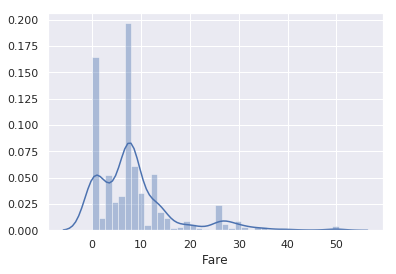

In [97]:
sns.distplot(merged[Columns.Fare])

보시다시피, distribution이 매우 비대칭인 것을 알 수 있습니다.(high skewness). <br>
만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다. <br>
몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.<br>
outlier의 영향을 줄이기 위해 Fare 에 log 를 취하겠습니다.

In [98]:
'''
log를 취하는 방법
'''

#merged[Columns.Fare] = merged[Columns.Fare].map(lambda i : np.log(i) if i > 0 else 0)

'''
등급을 4단계로 나누는 방법
'''
merged[Columns.FareBand] = pd.qcut(merged[Columns.Fare], 4, labels=[1,2,3,4]).astype('float')
#merged[Columns.Fare] = merged[Columns.FareBand]

merged.head(n=100)


,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Deck,FareBand
0,1,0.0,3,0,22.00,A/5 21171,7.250000,NaN,1.0,2,1,1,2.0
1,2,1.0,1,1,38.00,PC 17599,17.820825,C85,2.0,2,3,3,4.0
2,3,1.0,3,1,26.00,STON/O2. 3101282,7.925000,NaN,1.0,1,2,1,3.0
3,4,1.0,1,1,35.00,113803,13.275000,C123,1.0,2,3,3,4.0
4,5,0.0,3,0,35.00,373450,8.050000,NaN,1.0,1,1,1,3.0
5,6,0.0,3,0,21.00,330877,8.458300,NaN,3.0,1,1,1,3.0
6,7,0.0,1,0,54.00,17463,12.965625,E46,1.0,1,1,5,4.0
7,8,0.0,3,0,2.00,349909,0.006744,NaN,1.0,5,4,1,1.0
8,9,1.0,3,1,27.00,347742,0.412344,NaN,1.0,3,3,1,1.0
9,10,1.0,2,1,14.00,237736,7.517700,NaN,2.0,2,3,1,2.0


In [99]:
merged[Columns.Fare] = merged[Columns.FareBand]

In [100]:
merged[Columns.Fare] = merged[Columns.FareBand]
merged = merged.drop([Columns.FareBand], axis=1)
merged.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Deck
0,1,0.0,3,0,22.0,A/5 21171,2.0,NaN,1.0,2,1,1
1,2,1.0,1,1,38.0,PC 17599,4.0,C85,2.0,2,3,3
2,3,1.0,3,1,26.0,STON/O2. 3101282,3.0,NaN,1.0,1,2,1
3,4,1.0,1,1,35.0,113803,4.0,C123,1.0,2,3,3
4,5,0.0,3,0,35.0,373450,3.0,NaN,1.0,1,1,1


In [101]:
merged.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Deck
0,1,0.0,3,0,22.0,A/5 21171,2.0,NaN,1.0,2,1,1
1,2,1.0,1,1,38.0,PC 17599,4.0,C85,2.0,2,3,3
2,3,1.0,3,1,26.0,STON/O2. 3101282,3.0,NaN,1.0,1,2,1
3,4,1.0,1,1,35.0,113803,4.0,C123,1.0,2,3,3
4,5,0.0,3,0,35.0,373450,3.0,NaN,1.0,1,1,1


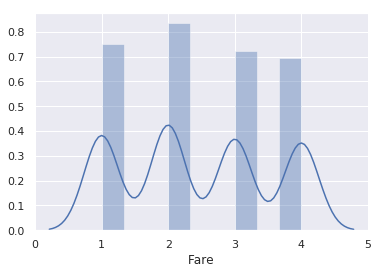

In [102]:
sns.distplot(merged[Columns.Fare])

In [103]:
merged.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Deck
0,1,0.0,3,0,22.0,A/5 21171,2.0,NaN,1.0,2,1,1
1,2,1.0,1,1,38.0,PC 17599,4.0,C85,2.0,2,3,3
2,3,1.0,3,1,26.0,STON/O2. 3101282,3.0,NaN,1.0,1,2,1
3,4,1.0,1,1,35.0,113803,4.0,C123,1.0,2,3,3
4,5,0.0,3,0,35.0,373450,3.0,NaN,1.0,1,1,1


Embarked 채움

In [104]:
print(merged[merged[Columns.Embarked].isnull()])
#sns.countplot(x=Columns.Embarked, hue=Columns.Survived, data=merged)
# 둘 다 살아 있으니 그냥 생존률이 높은 곳으로 넣어주자.
#merged[merged[Columns.Embarked].isnull()][Columns.Embarked] = 2.0
#merged.loc[merged[Columns.Embarked].isnull(), [Columns.Embarked]] = 2.0
merged.loc[lambda df : df[Columns.Embarked].isnull(), [Columns.Embarked]] = 2.0
print(merged[merged[Columns.Embarked].isnull()])

     PassengerId  Survived  Pclass  Sex   Age  Ticket  Fare Cabin  Embarked  \
61            62       1.0       1    1  38.0  113572   4.0   B28       NaN   
829          830       1.0       1    1  62.0  113572   4.0   B28       NaN   

     Family  Title  Deck  
61        1      2     4  
829       1      3     4  
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Sex, Age, Ticket, Fare, Cabin, Embarked, Family, Title, Deck]
Index: []


In [105]:
merged.describe(include='all')


,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Deck
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309,1309.000000,311,1309.000000,1309.000000,1309.000000,1309.000000
unique,NaN,NaN,NaN,NaN,NaN,929,NaN,186,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,CA. 2343,NaN,C22 C26,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,11,NaN,6,NaN,NaN,NaN,NaN
mean,655.000000,0.383838,2.294882,0.355997,28.652154,NaN,2.451490,NaN,1.395722,1.883881,1.734148,1.905271
std,378.020061,0.486592,0.837836,0.478997,13.274974,NaN,1.100518,NaN,0.653745,1.583639,1.027706,1.707658
min,1.000000,0.000000,1.000000,0.000000,0.170000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,1.000000
25%,328.000000,0.000000,2.000000,0.000000,21.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,1.000000
50%,655.000000,0.000000,3.000000,0.000000,27.000000,NaN,2.000000,NaN,1.000000,1.000000,1.000000,1.000000
75%,982.000000,1.000000,3.000000,1.000000,36.000000,NaN,3.000000,NaN,2.000000,2.000000,2.000000,2.000000


전처리가 다 되었으면 다음 과정을 수행한다.

- 불필요한 열 삭제
- scaling
- train/test로 다시 분리
- train을 input/label로 분리(Survived)

불필요한 열 삭제

In [106]:
if Columns.Ticket in merged:
    merged = merged.drop(labels=[Columns.Ticket], axis=1)
if Columns.Cabin in merged:
    merged = merged.drop(labels=[Columns.Cabin], axis=1)

# passengerId는 나중에 삭제한다.
# if Columns.PassengerId in merged:
#     merged = merged.drop(labels=[Columns.PassengerId], axis=1)

In [107]:
merged.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Title,Deck
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,0.355997,28.652154,2.451490,1.395722,1.883881,1.734148,1.905271
std,378.020061,0.486592,0.837836,0.478997,13.274974,1.100518,0.653745,1.583639,1.027706,1.707658
min,1.000000,0.000000,1.000000,0.000000,0.170000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,328.000000,0.000000,2.000000,0.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,655.000000,0.000000,3.000000,0.000000,27.000000,2.000000,1.000000,1.000000,1.000000,1.000000
75%,982.000000,1.000000,3.000000,1.000000,36.000000,3.000000,2.000000,2.000000,2.000000,2.000000
max,1309.000000,1.000000,3.000000,1.000000,80.000000,4.000000,3.000000,11.000000,6.000000,8.000000


In [108]:
merged.head(n=10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Title,Deck
0,1,0.0,3,0,22.0,2.0,1.0,2,1,1
1,2,1.0,1,1,38.0,4.0,2.0,2,3,3
2,3,1.0,3,1,26.0,3.0,1.0,1,2,1
3,4,1.0,1,1,35.0,4.0,1.0,2,3,3
4,5,0.0,3,0,35.0,3.0,1.0,1,1,1
5,6,0.0,3,0,21.0,3.0,3.0,1,1,1
6,7,0.0,1,0,54.0,4.0,1.0,1,1,5
7,8,0.0,3,0,2.0,1.0,1.0,5,4,1
8,9,1.0,3,1,27.0,1.0,1.0,3,3,1
9,10,1.0,2,1,14.0,2.0,2.0,2,3,1


입력 데이터를 0~1로 scaling하는 함수

In [109]:
from sklearn.preprocessing import MinMaxScaler

class NoColumnError(Exception):
    """Raised when no column in dataframe"""
    def __init__(self, value):
        self.value = value
    # __str__ is to print() the value
    def __str__(self):
        return(repr(self.value))

# normalize AgeGroup
def normalize_column(data, columnName):
    scaler = MinMaxScaler(feature_range=(0, 10))    
    if columnName in data:
        aaa = scaler.fit_transform(data[columnName].values.reshape(-1, 1)) # 입력을 2D 데이터로 넣어야 하므로 reshape해 준다.
        aaa = aaa.reshape(-1,) # 다시 원복해서 넣어주지만, 그냥 넣어도 알아서 제대로 들어간다...
        #print(aaa.shape)
        data[columnName] = aaa
        return data
    else:
        raise NoColumnError(str(columnName) + " is not exists!")

def normalize(dataset, columns):
    for col in columns:
        dataset = normalize_column(dataset, col)
    return dataset
#     dataset = normalize_column(dataset, Columns.Age)
#     dataset = normalize_column(dataset, Columns.Pclass)
#     dataset = normalize_column(dataset, Columns.Embarked)
#     dataset = normalize_column(dataset, Columns.Title)
#     dataset = normalize_column(dataset, Columns.SibSp)    
#     dataset = normalize_column(dataset, Columns.FareBand)    
#     dataset = normalize_column(dataset, Columns.Parch)

In [110]:
merged.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Title,Deck
0,1,0.0,3,0,22.0,2.0,1.0,2,1,1
1,2,1.0,1,1,38.0,4.0,2.0,2,3,3
2,3,1.0,3,1,26.0,3.0,1.0,1,2,1
3,4,1.0,1,1,35.0,4.0,1.0,2,3,3
4,5,0.0,3,0,35.0,3.0,1.0,1,1,1


In [111]:
merged = normalize(merged, [Columns.Pclass, Columns.Age, Columns.Fare, Columns.Embarked, Columns.Family, Columns.Title, Columns.Deck])

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [112]:
merged.head(n=10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Title,Deck
0,1,0.0,10.0,0,2.734561,3.333333,0.0,1.0,0.0,0.000000
1,2,1.0,0.0,1,4.738820,10.000000,5.0,1.0,4.0,2.857143
2,3,1.0,10.0,1,3.235626,6.666667,0.0,0.0,2.0,0.000000
3,4,1.0,0.0,1,4.363021,10.000000,0.0,1.0,4.0,2.857143
4,5,0.0,10.0,0,4.363021,6.666667,0.0,0.0,0.0,0.000000
5,6,0.0,10.0,0,2.609295,6.666667,10.0,0.0,0.0,0.000000
6,7,0.0,0.0,0,6.743079,10.000000,0.0,0.0,0.0,5.714286
7,8,0.0,10.0,0,0.229237,0.000000,0.0,4.0,6.0,0.000000
8,9,1.0,10.0,1,3.360892,0.000000,0.0,2.0,4.0,0.000000
9,10,1.0,5.0,1,1.732431,3.333333,5.0,1.0,4.0,0.000000


merged를 train/test로 분리한다.

In [113]:
train = merged[:train_len]
test = merged[train_len:]
test = test.drop([Columns.Survived], axis=1)

train = train.drop([Columns.PassengerId], axis=1)

test_passenger_id = test[Columns.PassengerId]
test = test.drop([Columns.PassengerId], axis=1)

print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [114]:
train_X = train.drop([Columns.Survived], axis=1).values #Series.values는 numpy array 타입의 데이터임
train_Y = train[Columns.Survived].values.reshape(-1, 1)
print(train_X.shape)
print(train_Y.shape)

(891, 8)
(891, 1)


In [115]:
test.shape

(418, 8)

In [117]:
test.describe(include='all')

,Pclass,Sex,Age,Fare,Embarked,Family,Title,Deck
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,6.327751,0.363636,3.607079,4.904306,2.320574,0.839713,1.483254,1.308954
std,4.209188,0.481622,1.637534,3.686905,3.427580,1.519072,2.012183,2.465511
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.609295,3.333333,0.000000,0.000000,0.000000,0.000000
50%,10.000000,0.000000,3.235626,3.333333,0.000000,0.000000,0.000000,0.000000
75%,10.000000,1.000000,4.488288,6.666667,5.000000,1.000000,2.000000,1.428571
max,10.000000,1.000000,9.498935,10.000000,10.000000,10.000000,8.000000,8.571429


In [118]:
import tensorflow as tf

train_X = train_X.astype(np.float32)
train_Y = train_Y.astype(np.float32)
print(train_X.shape)
print(train_Y.shape)

X = tf.placeholder(tf.float32, shape=[None, train_X.shape[1]])
Y = tf.placeholder(tf.float32, shape=[None, 1])

learning_rate = tf.placeholder(tf.float32)
keep_prob = tf.placeholder(tf.float32)
    
def build_neural_network(X):    
    initializer = tf.contrib.layers.xavier_initializer()
    fc = tf.layers.dense(X, 20, activation=None, kernel_initializer=initializer)
    fc = tf.nn.relu(fc)
    fc = tf.nn.dropout(fc, keep_prob=keep_prob)
    
    fc = tf.layers.dense(fc, 8, activation=None, kernel_initializer=initializer)
    fc = tf.nn.relu(fc)
    fc = tf.nn.dropout(fc, keep_prob=keep_prob)
    
    logits = tf.layers.dense(fc, 1, activation=None)    
    return logits

def get_batch(i, x, y, batch_size=32):
    end = (i + 1) * batch_size
    if end > x.shape[0]:        
        end = x.shape[0]        
    batch_x = x[i * batch_size : end]
    batch_y = y[i * batch_size : end]
    #print("get_batch:", batch_x.shape, batch_y.shape)
    return batch_x, batch_y

logits = build_neural_network(X)
# print(logits)
# print(train_Y.shape)
a = tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=logits)
cost = tf.reduce_mean(a)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
prediction = tf.nn.sigmoid(logits)
is_correct = tf.equal(tf.round(prediction), Y)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

epochs = 1000
batch_size = 32
num_batch = train_X.shape[0] // batch_size
print("num_batch=", num_batch)
lr = 0.01
kp = 0.7

from sklearn.preprocessing import Binarizer
binarizer=Binarizer(0.5)

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        avg_cost = 0
        for batch_idx in range(num_batch + 1):
            batch_x, batch_y = get_batch(batch_idx, train_X, train_Y, batch_size)
            c, _ = session.run([cost, optimizer], feed_dict={X:batch_x, Y:batch_y, learning_rate:lr, keep_prob:kp})
            avg_cost += (c / num_batch)
            
        print("epoch:", epoch, " cost:{:.9f}".format(avg_cost))
        
    print("accuracy:", accuracy.eval(session=session, feed_dict={X:train_X, Y:train_Y, keep_prob:1.0}))
    
    pred = session.run(prediction, feed_dict={X:test, keep_prob:1.0}) # (418,1)
    print(pred.shape)
    print("nan count:", np.count_nonzero(np.isnan(pred) == True))
    
    test_predict_result=binarizer.fit_transform(pred)
    test_predict_result=test_predict_result.astype(np.int32)
    #print(test_predict_result[:10])
    submission = pd.DataFrame({"PassengerId" : test_passenger_id, "Survived":test_predict_result.reshape(-1)})
    submission.to_csv('submission.csv', index=False)
    
    print(submission)

(891, 8)
(891, 1)
num_batch= 27
epoch: 0  cost:0.787552549
epoch: 1  cost:0.632499487
epoch: 2  cost:0.584233480
epoch: 3  cost:0.587894277
epoch: 4  cost:0.546068416
epoch: 5  cost:0.546879779
epoch: 6  cost:0.505775988
epoch: 7  cost:0.516707834
epoch: 8  cost:0.505855938
epoch: 9  cost:0.510577137
epoch: 10  cost:0.512965001
epoch: 11  cost:0.494295060
epoch: 12  cost:0.467938009
epoch: 13  cost:0.481369109
epoch: 14  cost:0.494308835
epoch: 15  cost:0.472995916
epoch: 16  cost:0.470076379
epoch: 17  cost:0.474885518
epoch: 18  cost:0.486276036
epoch: 19  cost:0.460869520
epoch: 20  cost:0.452730402
epoch: 21  cost:0.456103447
epoch: 22  cost:0.468340412
epoch: 23  cost:0.463090851
epoch: 24  cost:0.469138116
epoch: 25  cost:0.457992473
epoch: 26  cost:0.453917477
epoch: 27  cost:0.449621723
epoch: 28  cost:0.441749000
epoch: 29  cost:0.433908641
epoch: 30  cost:0.430435414
epoch: 31  cost:0.442070473
epoch: 32  cost:0.438345288
epoch: 33  cost:0.466075818
epoch: 34  cost:0.43637286

epoch: 285  cost:0.399098827
epoch: 286  cost:0.425205651
epoch: 287  cost:0.396940963
epoch: 288  cost:0.409547009
epoch: 289  cost:0.411640600
epoch: 290  cost:0.397643443
epoch: 291  cost:0.421195856
epoch: 292  cost:0.397735495
epoch: 293  cost:0.411535513
epoch: 294  cost:0.411680096
epoch: 295  cost:0.404607835
epoch: 296  cost:0.413350813
epoch: 297  cost:0.412136731
epoch: 298  cost:0.412228939
epoch: 299  cost:0.400993762
epoch: 300  cost:0.417465731
epoch: 301  cost:0.437669640
epoch: 302  cost:0.429579546
epoch: 303  cost:0.398048720
epoch: 304  cost:0.389428794
epoch: 305  cost:0.416383464
epoch: 306  cost:0.409500865
epoch: 307  cost:0.391450269
epoch: 308  cost:0.384458269
epoch: 309  cost:0.412373978
epoch: 310  cost:0.409682765
epoch: 311  cost:0.404092488
epoch: 312  cost:0.386025927
epoch: 313  cost:0.402170421
epoch: 314  cost:0.411836243
epoch: 315  cost:0.402106379
epoch: 316  cost:0.426499831
epoch: 317  cost:0.404597565
epoch: 318  cost:0.418061445
epoch: 319  co

epoch: 572  cost:0.391394370
epoch: 573  cost:0.423105841
epoch: 574  cost:0.395428256
epoch: 575  cost:0.391036522
epoch: 576  cost:0.410100037
epoch: 577  cost:0.405064917
epoch: 578  cost:0.403330632
epoch: 579  cost:0.391398149
epoch: 580  cost:0.386715578
epoch: 581  cost:0.406189146
epoch: 582  cost:0.406965768
epoch: 583  cost:0.428433022
epoch: 584  cost:0.393519945
epoch: 585  cost:0.390834047
epoch: 586  cost:0.399325929
epoch: 587  cost:0.392528556
epoch: 588  cost:0.384392976
epoch: 589  cost:0.391390417
epoch: 590  cost:0.399752886
epoch: 591  cost:0.400257042
epoch: 592  cost:0.407580412
epoch: 593  cost:0.404883916
epoch: 594  cost:0.409996652
epoch: 595  cost:0.418254568
epoch: 596  cost:0.384212251
epoch: 597  cost:0.419501393
epoch: 598  cost:0.398202218
epoch: 599  cost:0.393199872
epoch: 600  cost:0.399377508
epoch: 601  cost:0.397959767
epoch: 602  cost:0.417513678
epoch: 603  cost:0.398164610
epoch: 604  cost:0.397765216
epoch: 605  cost:0.389393772
epoch: 606  co

epoch: 856  cost:0.400966136
epoch: 857  cost:0.398017539
epoch: 858  cost:0.402748222
epoch: 859  cost:0.403697675
epoch: 860  cost:0.398020111
epoch: 861  cost:0.404672919
epoch: 862  cost:0.423065559
epoch: 863  cost:0.410187677
epoch: 864  cost:0.397631778
epoch: 865  cost:0.399136384
epoch: 866  cost:0.394420724
epoch: 867  cost:0.391901271
epoch: 868  cost:0.403984705
epoch: 869  cost:0.388925259
epoch: 870  cost:0.392407595
epoch: 871  cost:0.400330821
epoch: 872  cost:0.391040404
epoch: 873  cost:0.404394366
epoch: 874  cost:0.402856592
epoch: 875  cost:0.413110196
epoch: 876  cost:0.395591572
epoch: 877  cost:0.402603344
epoch: 878  cost:0.389201862
epoch: 879  cost:0.397386200
epoch: 880  cost:0.411024783
epoch: 881  cost:0.396852907
epoch: 882  cost:0.394283987
epoch: 883  cost:0.406754416
epoch: 884  cost:0.409843102
epoch: 885  cost:0.411338682
epoch: 886  cost:0.388608972
epoch: 887  cost:0.394451178
epoch: 888  cost:0.393443331
epoch: 889  cost:0.385589617
epoch: 890  co